# 1. Get the Data

Source

The dataset is from a cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes, and is publically available on the Kaggle website.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"gopushaji","key":"0e96d275a51e1a059794a18cb31818e1"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

heart-disease-prediction-using-logistic-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip heart-disease-prediction-using-logistic-regression

Archive:  heart-disease-prediction-using-logistic-regression.zip
replace framingham.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: framingham.csv          


Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
pwd

'/content'

Getting the data set into a pandas dataframe

In [216]:
data = pd.read_csv('/content/framingham.csv')
dummy_data = data

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.shape

(4238, 16)

In [ ]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Preprocessing

## Handle the missing values in the data

### Handle Missing values in Education

In [ ]:
data.education.value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

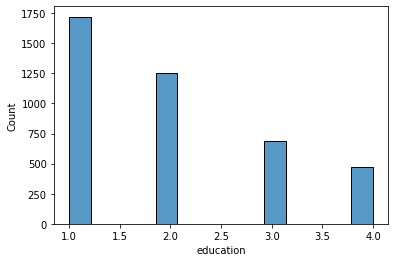

In [ ]:
sns.histplot(data.education)

In [ ]:
data.groupby('education')['age'].mean()

education
1.0    51.941860
2.0    47.255387
3.0    48.754003
4.0    48.150106
Name: age, dtype: float64

Educational level doesnt seem to vary much with average age of each level. so we may replace the missing values directly using backward fill

In [ ]:
data.education.fillna(method='bfill', inplace = True)

In [ ]:
data.education.isna().sum()

0

In [ ]:
warnings.filterwarnings('ignore')

### Handle Missing values in cigsPerDay

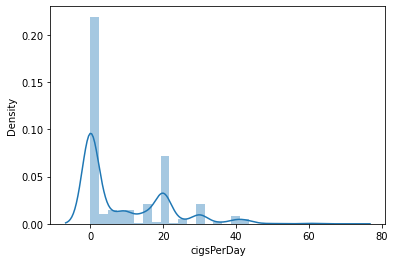

In [ ]:
sns.distplot(data.cigsPerDay)

In [ ]:
#looks like the distribution of cigsPerDay is highly skewed. So the missing values shall be replaced by the median of the values

In [ ]:
cig_median = data.cigsPerDay.median()
data.cigsPerDay.fillna(cig_median,inplace=True)

In [ ]:
data.cigsPerDay.isna().sum()

0

### Handle Missing values in BPMed

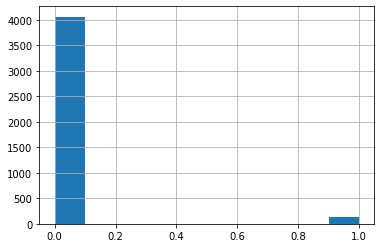

In [ ]:
data.BPMeds.hist()

In [ ]:
# Its observed that 0 is frequently occuring for this column. So we shall replace the missing values with 0 which is the mode 

In [ ]:
data.BPMeds.fillna(0, inplace = True)

In [ ]:
data.BPMeds.isna().sum()

0

### Handle Missing values in totChol

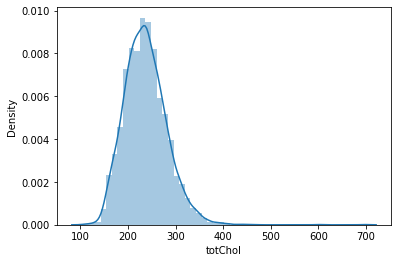

In [ ]:
sns.distplot(data.totChol)

In [ ]:
# The distributuion is slightly right skewed. So we shall replace the missing values using the median
data.totChol.fillna(data.totChol.median(), inplace=True)
data.totChol.isna().sum()

0

### Handle Missing values in BMI

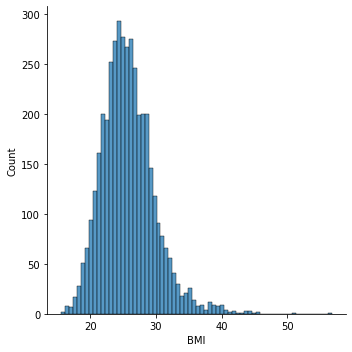

In [ ]:
sns.displot(data.BMI)

In [ ]:
# The distributuion is slightly right skewed. So we shall replace the missing values using the median
data.BMI.fillna(data.BMI.median(), inplace=True)
data.BMI.isna().sum()

0

### Handle Missing values in glucose

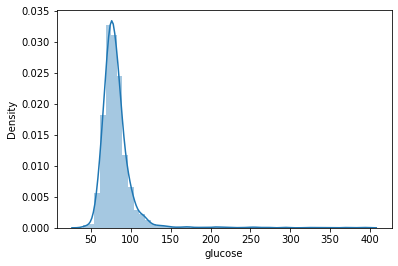

In [ ]:
sns.distplot(data.glucose)

In [ ]:
# The distributuion is slightly right skewed. So we shall replace the missing values using the median
data.glucose.fillna(data.glucose.median(), inplace=True)
data.glucose.isna().sum()

0

In [ ]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

### Handle Missing values in heartrrate

In [ ]:
# This column has only one missing value. so we may drop this row
data.dropna(axis=0,inplace= True)
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
data.shape

(4237, 16)

All missing values has been treated appropriately

##Outlier Detection and Handling

In [ ]:
#Lets plot the distribution of continuous numerical features
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
cont_num = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

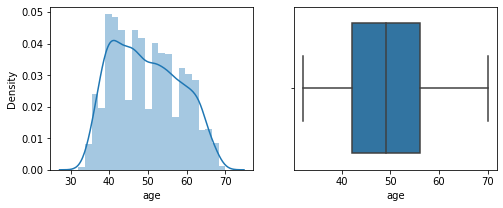

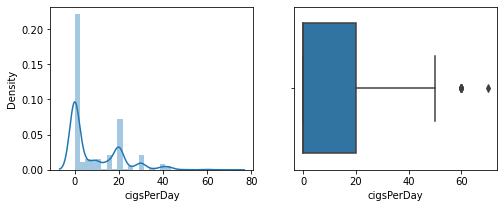

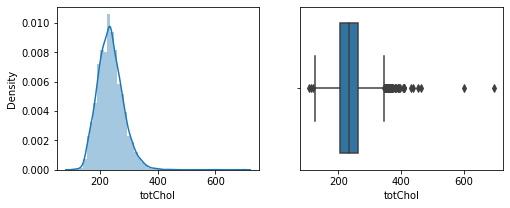

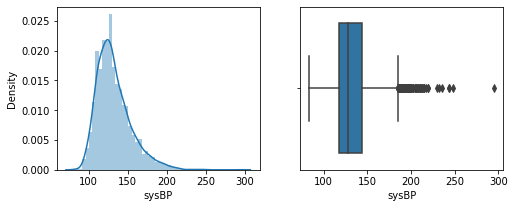

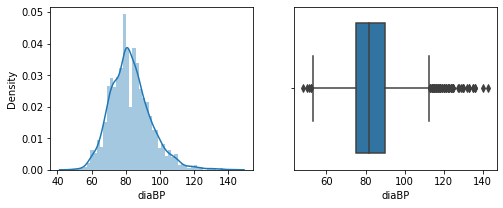

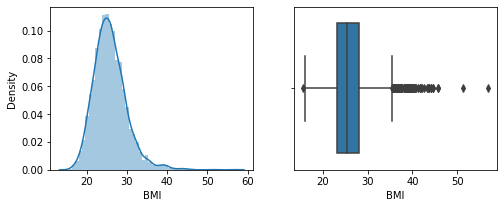

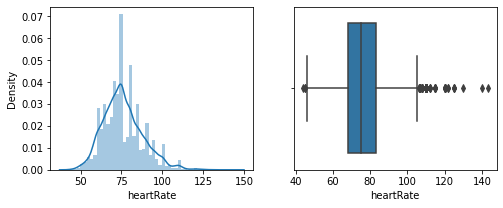

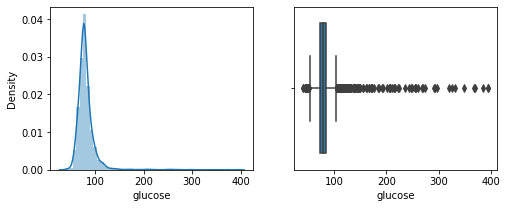

In [ ]:
for cat in cont_num:
  plt.figure(figsize=(8,3))
  plt.subplot(1,2,1)
  sns.distplot(data[cat])
  plt.subplot(1,2,2)
  sns.boxplot(data[cat])
  plt.show()

'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose' 
seems to be highly right skewed. Lets apply a logarithmic transform to reduce  the skewness

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


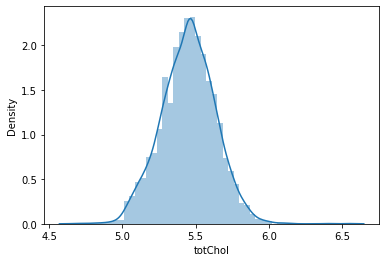

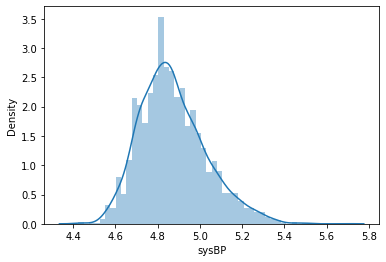

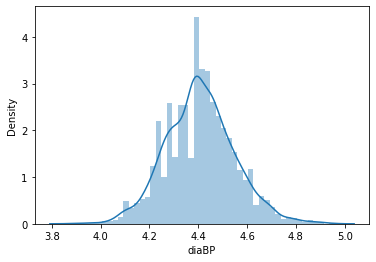

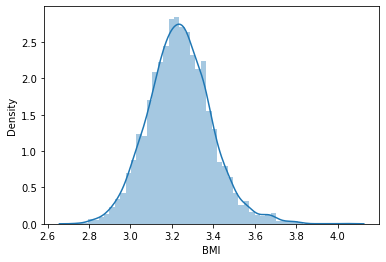

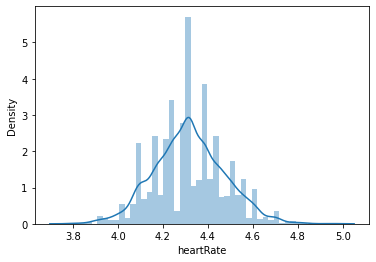

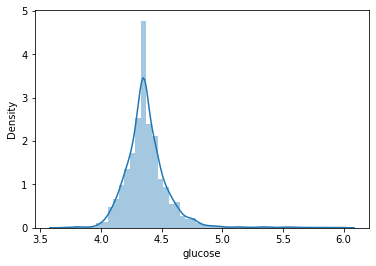

In [ ]:
skewed = ['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
for col in skewed:
  data[col] = np.log(data[col])
  sns.distplot(data[col])
  plt.show()

In [ ]:
#cigsPerDay column contains few outliers. This can be removed by omitting the rows
Q1 = np.percentile(data.cigsPerDay,25)
Q3 = np.percentile(data.cigsPerDay,75)
IQR = Q3 - Q1
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR
out_index = data[(data.cigsPerDay>up_lim) | (data.cigsPerDay<low_lim)].index

In [ ]:
out_index

Int64Index([327, 721, 1054, 1452, 1468, 1488, 1849, 2709, 2710, 3008, 3673,
            3928],
           dtype='int64')

In [ ]:
data.drop(index = list(out_index), inplace = True)

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805,0
1,0,46,2.0,0,0.0,0.0,0,0,0,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733,0
2,1,48,1.0,1,20.0,0.0,0,0,0,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495,0
3,0,61,3.0,1,30.0,0.0,0,1,0,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729,1
4,0,46,3.0,1,23.0,0.0,0,0,0,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,5.746203,5.187386,4.521789,3.256942,4.189655,4.454347,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,5.332719,4.840242,4.382027,2.981126,4.174387,4.219508,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,5.513429,4.875197,4.276666,3.091042,4.430817,4.454347,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,5.347108,4.840242,4.465908,2.952825,4.454347,4.356709,0


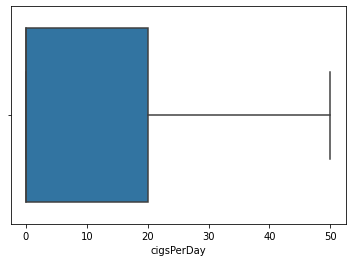

In [ ]:
sns.boxplot(data.cigsPerDay)

## Feature Reduction

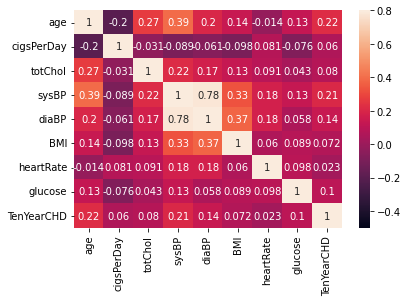

In [ ]:
# Plotting a heatmap to review the correlation between continuous numerical variables
num_col = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
sns.heatmap(data[num_col].corr(method = 'pearson'), annot = True, vmin = -0.5, vmax = 0.8)

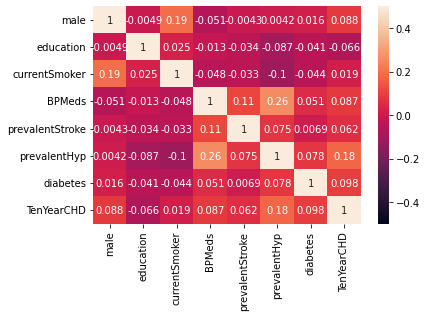

In [ ]:
# Plotting a heatmap to review the correlation between categorical variables
cat_col = ['male', 'education', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
sns.heatmap(data[cat_col].corr(method = 'spearman'), annot = True, vmin = -0.5, vmax = 0.5)

From the two heatmaps it can be seen that only sysBP and diaBP has a high positive correlation. So the feature diaBP can be dropped from the data before further proceeding

In [ ]:
data.drop('diaBP', axis = 1, inplace = True)

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,5.273000,4.663439,3.294725,4.382027,4.343805,0
1,0,46,2.0,0,0.0,0.0,0,0,0,5.521461,4.795791,3.357942,4.553877,4.330733,0
2,1,48,1.0,1,20.0,0.0,0,0,0,5.501258,4.848116,3.232384,4.317488,4.248495,0
3,0,61,3.0,1,30.0,0.0,0,1,0,5.416100,5.010635,3.352707,4.174387,4.634729,1
4,0,46,3.0,1,23.0,0.0,0,0,0,5.652489,4.867534,3.139833,4.442651,4.442651,0


In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.427456,49.581065,1.980118,0.492544,8.791953,0.029349,0.005917,0.310059,0.025799,5.449531,4.872578,3.238429,4.316916,4.378752,0.151716
std,0.494768,8.570266,1.019731,0.500004,11.592658,0.168803,0.076704,0.462572,0.158553,0.184322,0.157646,0.152465,0.155926,0.195699,0.358788
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.672829,4.424847,2.743417,3.784190,3.688879,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.327876,4.762174,3.138533,4.219508,4.276666,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.455321,4.852030,3.234749,4.317488,4.356709,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,5.568345,4.969813,3.332919,4.418841,4.442651,0.000000
max,1.000000,70.000000,4.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,6.545350,5.686975,4.039536,4.962845,5.976351,1.000000


In [ ]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##Standardisation


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num_feat = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
std_val = pd.DataFrame(scale.fit_transform(data[num_feat]))
std_val.columns = np.array(num_feat)
std_val.describe().round(3)

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose
count,4225.000,4225.000,4225.000,4225.000,4225.000,4225.000,4225.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.052,-0.758,-4.214,-2.840,-3.247,-3.417,-3.526
25%,-0.885,-0.758,-0.660,-0.700,-0.655,-0.625,-0.522
50%,-0.068,-0.758,0.031,-0.130,-0.024,0.004,-0.113
75%,0.749,0.967,0.645,0.617,0.620,0.654,0.327
max,2.383,3.555,5.946,5.167,5.255,4.143,8.165


In [ ]:
std_val.head()

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose
0,-1.234771,-0.758497,-0.957847,-1.326791,0.369283,0.417626,-0.178592
1,-0.417897,-0.758497,0.390287,-0.487145,0.783964,1.519884,-0.245397
2,-0.184504,0.966937,0.280668,-0.155187,-0.039654,0.003672,-0.665675
3,1.332548,1.829654,-0.181392,0.875843,0.749626,-0.914185,1.308173
4,-0.417897,1.225753,1.101237,-0.031998,-0.646762,0.806476,0.326560


In [ ]:
std_val.shape

(4225, 7)

In [ ]:
data.loc[:,num_feat]= std_val.values

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234771,4.0,0,-0.758497,0.0,0,0,0,-0.957847,-1.326791,0.369283,0.417626,-0.178592,0
1,0,-0.417897,2.0,0,-0.758497,0.0,0,0,0,0.390287,-0.487145,0.783964,1.519884,-0.245397,0
2,1,-0.184504,1.0,1,0.966937,0.0,0,0,0,0.280668,-0.155187,-0.039654,0.003672,-0.665675,0
3,0,1.332548,3.0,1,1.829654,0.0,0,1,0,-0.181392,0.875843,0.749626,-0.914185,1.308173,1
4,0,-0.417897,3.0,1,1.225753,0.0,0,0,0,1.101237,-0.031998,-0.646762,0.806476,0.326560,0


#3. Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# Lets check the frequency distribution of the categorical variables using histograms

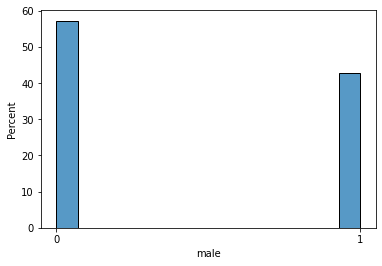

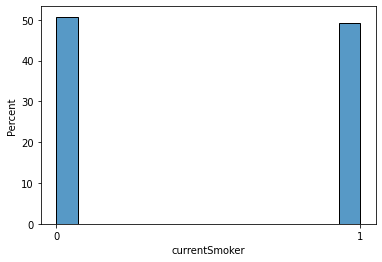

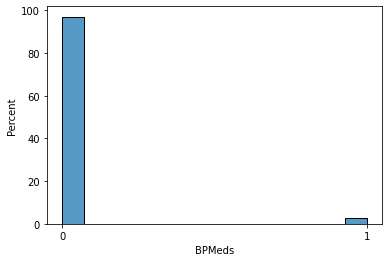

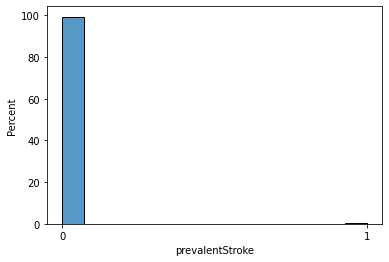

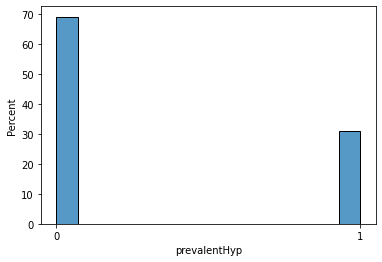

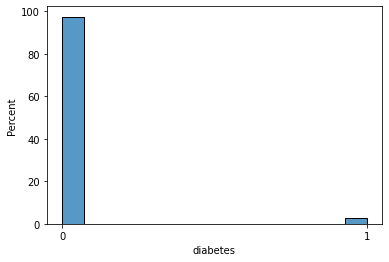

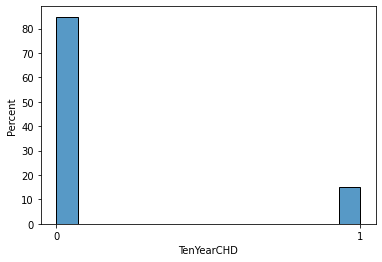

In [ ]:
cat_col = ['male','currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

for col in cat_col:
  sns.histplot(dummy_data[col], stat = 'percent')
  plt.xticks([0,1])
  plt.show()



*   The male to female ratio is approximately 40:60
*   The data consists of a faily equal distribution of smokers and non smokers
*   Data is highly skewed in terms of BPmeds, prevalentStroke and diabetes classes. All of these three classes are distributed on around 95:5 proportion
*   The prevalentHyp column is distributed in 65:35 ratio.





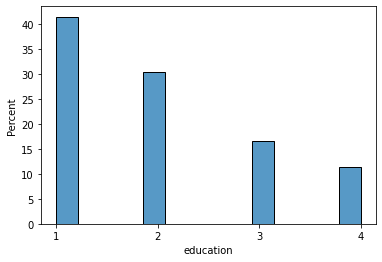

In [ ]:
sns.histplot(dummy_data.education, stat = 'percent')
plt.xticks([1,2,3,4])
plt.show()

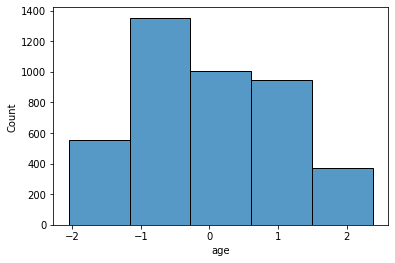

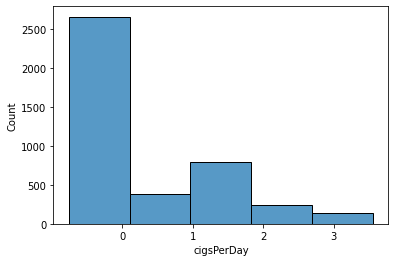

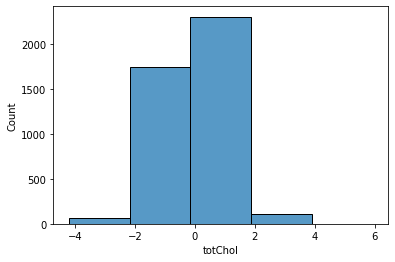

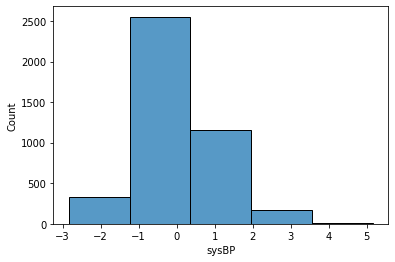

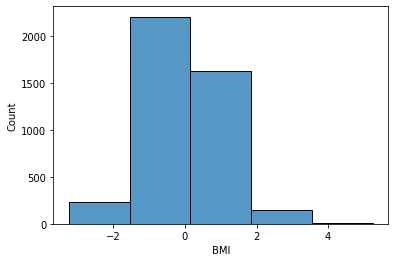

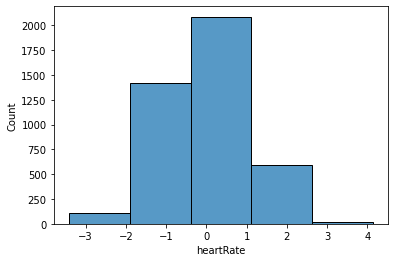

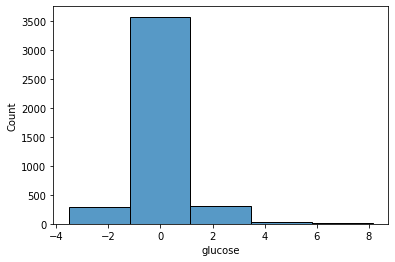

In [ ]:
# Now lets check the frequency distribution of the continuous variables, after binning them in to 5 bins in each column
for col in num_feat:
  sns.histplot(dummy_data[col],bins=5)
  plt.show()

## Bivariate Analysis

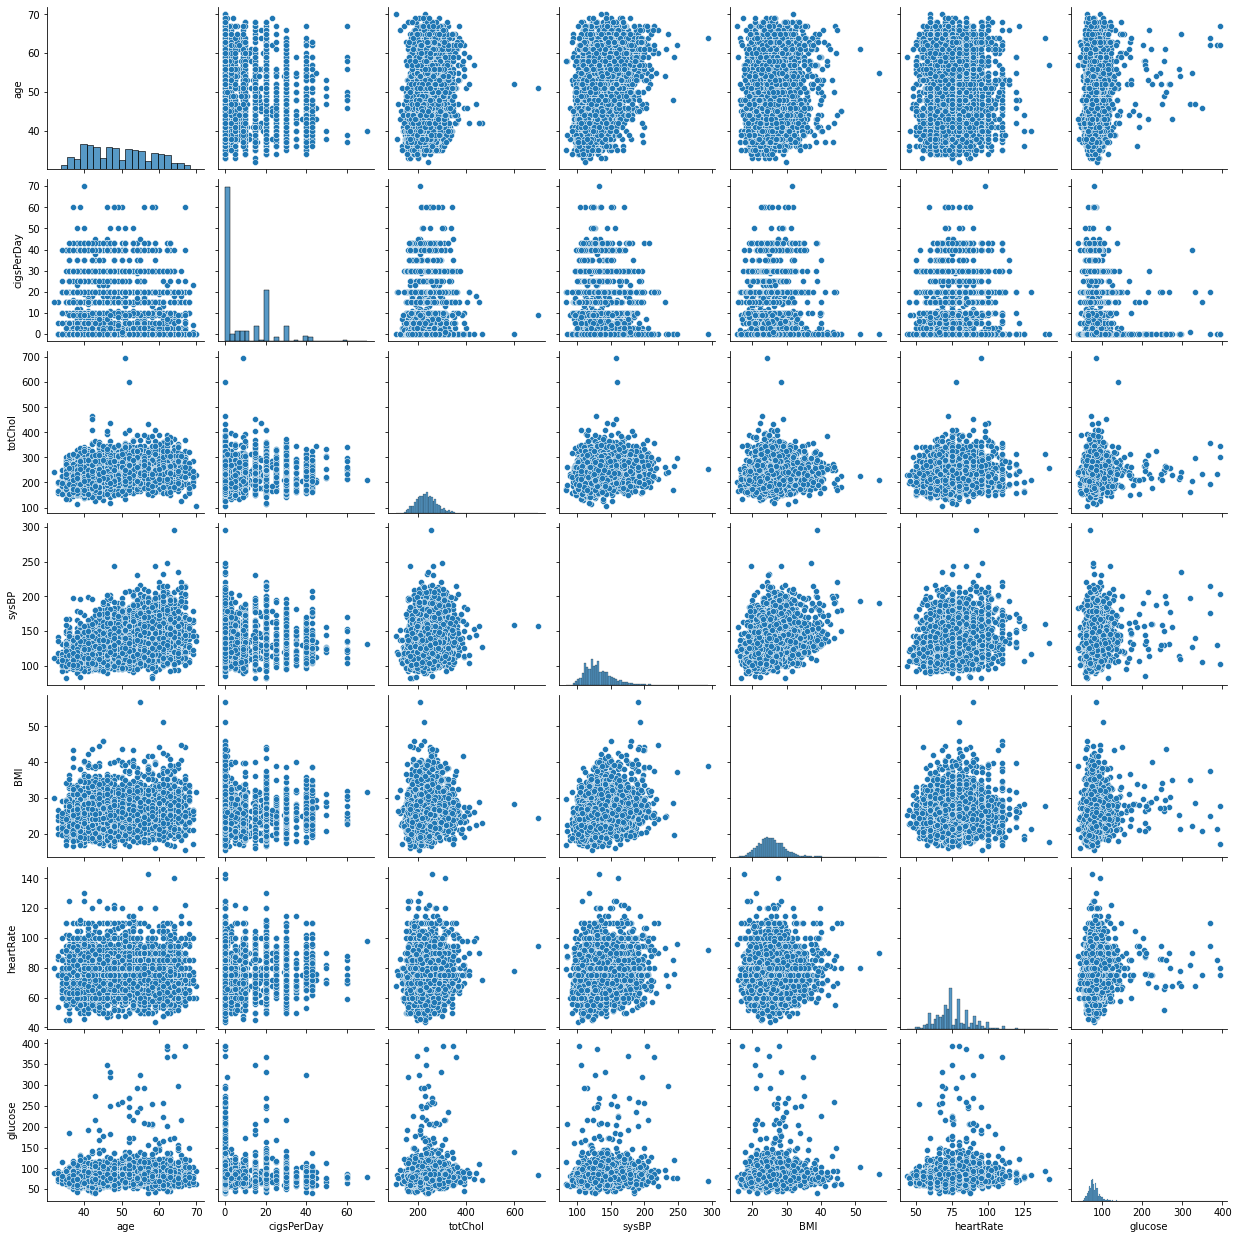

In [244]:
sns.pairplot(data[num_feat])

In [ ]:
#Looks like all the numerical continuous variable like 'age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose' are all loosely correlated with each other

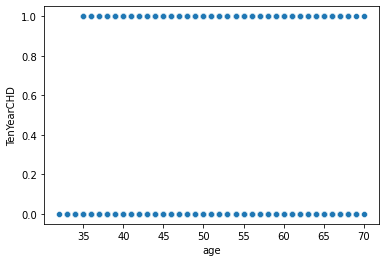

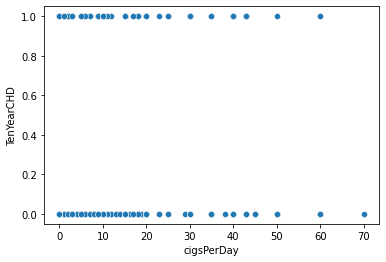

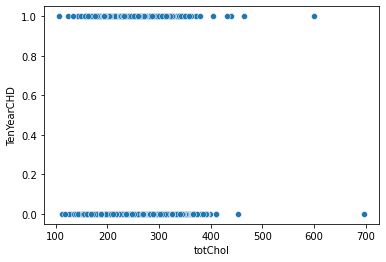

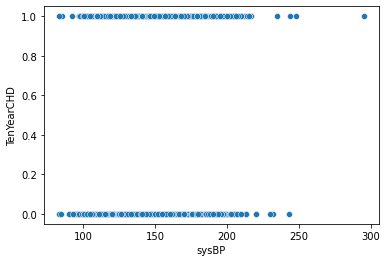

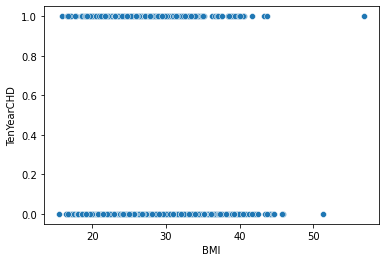

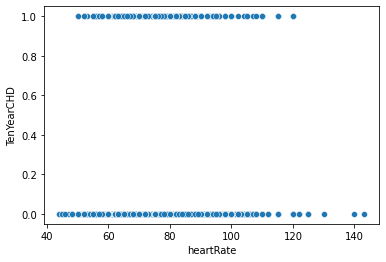

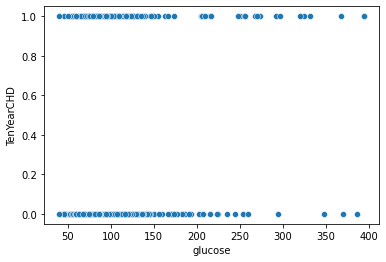

In [249]:
for feat in num_feat:
  sns.swarmplot(x= feat,y='TenYearCHD', data = data)
  plt.show()



1.  Individuals with higher age are more prone to CHD compared to individuals with a lower age
2.   People with lower glucose level seems to be more prone to have CHD
3. Individuals with a higher than normal heartbeat should be concerned



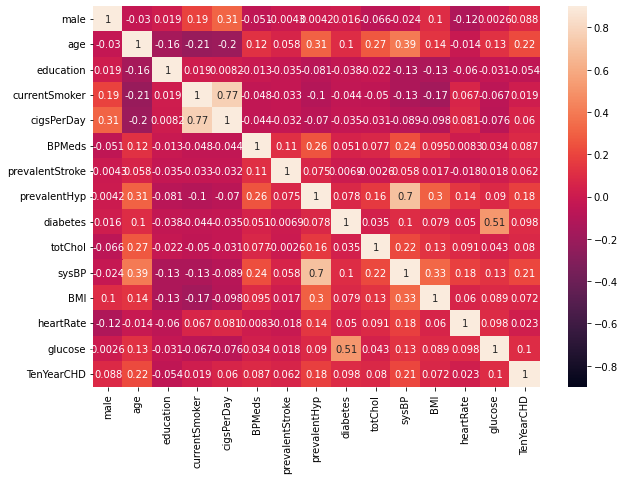

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(method = 'pearson'),annot = True, vmin = -0.9, vmax = 0.9)

All the features in the dataset are observed to be weakly correlated to each other

#4. Modelling

The problem stated is a classification problem. So for this a model should be a classification model like a:

  Logistic Regression

  k- Nearest Neighbor

  Support Vector Machine

  Decision Tree Classifier

  Random Forest Classifier

  Gradient Boosting Classifier
  
  XGB Classifier

  Naive Bayes Classifier etc.

Lets try each model with the given data set and evaluate which one would give a better accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

Lets split the data into train and test set for training and evaluating the model

In [ ]:
y = data['TenYearCHD'].values.reshape(-1,1)
X = data.drop('TenYearCHD',axis = 1).values

In [ ]:
y.shape

(4225, 1)

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 18, test_size= 0.2)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3380, 14) (845, 14) (3380, 1) (845, 1)


In [169]:
scores_dict = {}

##Logistic Regression

In [135]:
logModel = LogisticRegression()

In [136]:
log_param_grid = [
                  {'penalty':['l1','l2','elasticnet','none'],
                   'C':np.logspace(-4,4,20),
                   'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
                   'max_iter':[100,500,1000]
                   }
]

In [137]:
clf = GridSearchCV(logModel,param_grid=log_param_grid,cv=3,verbose=True,n_jobs = -1)

In [138]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


In [139]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [140]:
best_clf.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [141]:
best_clf.best_score_

0.8579891915063964

In [142]:
best_clf.score(X_test,y_test)

0.8473372781065088

In [172]:
best_log_clf = best_clf.best_estimator_
scores_dict['Log_Reg'] = [best_clf.best_score_,best_clf.score(X_test,y_test)]

## k Nearest Neighbor Classifier

In [ ]:
knnModel = KNeighborsClassifier(metric='minkowski')

In [ ]:
n_neighbors = np.arange(10,30)
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
leaf_size = [20,30,40]
p=[1,2,3,4]
n_jobs = [-1]

In [ ]:
knn_param_grid = [
                  {'n_neighbors':n_neighbors,
                   'leaf_size':leaf_size,
                   'p':p,
                   }
]

In [ ]:
knn_clf = GridSearchCV(knnModel,param_grid=knn_param_grid,cv=3,verbose=True)

In [ ]:
knn_clf.fit(X_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [20, 30, 40],
                          'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                          'p': [1, 2, 3, 4]}],
             verbose=True)

In [ ]:
knn_clf.best_params_

{'leaf_size': 20, 'n_neighbors': 16, 'p': 1}

In [173]:
best_knn_clf = knn_clf.best_estimator_
scores_dict['KNN'] = [knn_clf.best_score_,knn_clf.score(X_test,y_test)]

##Support Vector Machine

In [143]:
svcModel = SVC(random_state = 18)

In [144]:
svc_param_grid = [
                  {'C':[1.0,10.0,20.0],
                   'gamma':['auto','scale'],
                   'kernel':['rbf','poly','linear'],
                   'degree':[3,4,5],
                   'decision_function_shape':['ovo', 'ovr'],
                   'max_iter':[1,5,10,-1],
                   'shrinking':[True,False]
                   }
]

In [145]:
svc_clf = GridSearchCV(svcModel,svc_param_grid, cv=3, return_train_score=True)


In [146]:
svc_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=18),
             param_grid=[{'C': [1.0, 10.0, 20.0],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [3, 4, 5], 'gamma': ['auto', 'scale'],
                          'kernel': ['rbf', 'poly', 'linear'],
                          'max_iter': [1, 5, 10, -1],
                          'shrinking': [True, False]}],
             return_train_score=True)

In [147]:
svc_clf.best_estimator_

SVC(decision_function_shape='ovo', degree=4, gamma='auto', kernel='poly',
    random_state=18)

In [148]:
svc_clf.best_params_

{'C': 1.0,
 'decision_function_shape': 'ovo',
 'degree': 4,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True}

In [149]:
svc_clf.score(X_test,y_test)

0.8461538461538461

In [174]:
best_svc_clf = svc_clf.best_estimator_
scores_dict['SVM'] = [svc_clf.best_score_,svc_clf.score(X_test,y_test)]

##Decision Tree Classifier

In [150]:
dtModel = DecisionTreeClassifier()

In [151]:
dt_param_grid = [
                 {'criterion':['gini','entropy'],
                  'max_depth':[1,2,3,4,5,6,7,None]}
]

In [152]:
dt_clf = GridSearchCV(dtModel,param_grid = dt_param_grid, cv=3)

In [153]:
dt_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}])

In [154]:
dt_clf.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [155]:
dt_clf.score(X_test,y_test)

0.8402366863905325

In [175]:
best_dt_clf = dt_clf.best_estimator_
scores_dict['D_Tree'] = [dt_clf.best_score_,dt_clf.score(X_test,y_test)]

##Random Forest Classifier

In [156]:
rfModel = RandomForestClassifier(random_state = 18)

In [157]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True,False]

In [158]:
rf_param_grid = [
                 {'n_estimators':n_estimators,
                  'max_features':max_features,
                  'max_depth':max_depth,
                  'min_samples_split':min_samples_split,
                  'min_samples_leaf':min_samples_leaf,
                  'bootstrap':bootstrap}
                 ]

In [159]:
rf_clf = GridSearchCV(estimator = rfModel, param_grid = rf_param_grid, cv = 3, verbose=2, n_jobs=-1)

In [160]:
rf_clf.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=18), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False], 'max_depth': [2, 4],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 2],
                          'min_samples_split': [2, 5],
                          'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                           80]}],
             verbose=2)

In [161]:
rf_clf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=56, random_state=18)

In [162]:
rf_clf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 56}

In [163]:
rf_clf.score(X_test,y_test)

0.8414201183431953

In [176]:
best_rf_clf = rf_clf.best_estimator_
scores_dict['Rand_Forest'] = [rf_clf.best_score_,rf_clf.score(X_test,y_test)]

##Gradient Boosting Classifier

In [164]:
gbModel = GradientBoostingClassifier(random_state = 18)

In [165]:
gb_param_grid = [
                 {'loss':['deviance','exponential'],
                  'learning_rate':[0.05,0.1,0.2],
                  'n_estimators':[100,200],
                  'criterion':['friedman_mse', 'mae'],
                  'max_depth':[2,3,4]
                  }
]

In [166]:
gb_clf = GridSearchCV(estimator = gbModel, param_grid = gb_param_grid, cv = 3, verbose=2, n_jobs=-1)

In [167]:
gb_clf.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=18),
             n_jobs=-1,
             param_grid=[{'criterion': ['friedman_mse', 'mae'],
                          'learning_rate': [0.05, 0.1, 0.2],
                          'loss': ['deviance', 'exponential'],
                          'max_depth': [2, 3, 4], 'n_estimators': [100, 200]}],
             verbose=2)

In [168]:
gb_clf.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'exponential',
 'max_depth': 2,
 'n_estimators': 100}

In [177]:
best_gb_clf = gb_clf.best_estimator_
scores_dict['Grad_Boost'] = [gb_clf.best_score_,gb_clf.score(X_test,y_test)]

##XGB Classifier

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [184]:
xgbModel = XGBClassifier(random_state=18)

In [185]:
xgb_param_grid = [
                 {'learning_rate':[0.05,0.1,0.2],
                  'n_estimators':[100,200],
                  'max_depth':[2,3,4,5]
                  }
]

In [186]:
xgb_clf = GridSearchCV(estimator = xgbModel, param_grid = xgb_param_grid, cv = 3, verbose=2, n_jobs=-1)

In [187]:
xgb_clf.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=XGBClassifier(random_state=18), n_jobs=-1,
             param_grid=[{'learning_rate': [0.05, 0.1, 0.2],
                          'max_depth': [2, 3, 4, 5],
                          'n_estimators': [100, 200]}],
             verbose=2)

In [188]:
best_xgb_clf = xgb_clf.best_estimator_
scores_dict['XGB'] = [xgb_clf.best_score_,xgb_clf.score(X_test,y_test)]

#Gaussian Naive Bayes Classifier

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       710
           1       0.41      0.22      0.29       135

    accuracy                           0.82       845
   macro avg       0.64      0.58      0.59       845
weighted avg       0.79      0.82      0.80       845



In [179]:
scores_dict['GaussianNB'] = [gnb_model.score(X_train,y_train),gnb_model.score(X_test,y_test)]

# 5. Model Fine Tuning

The details of Cross Validation Score and Test Score for each of the above classification models can be summarized as below:

In [189]:
pd.DataFrame(scores_dict,index=['CV Score','Test Score'])

,Log_Reg,KNN,SVM,D_Tree,Rand_Forest,Grad_Boost,XGB,GaussianNB
CV Score,0.857989,0.851775,0.852071,0.850296,0.85148,0.851775,0.852959,0.831065
Test Score,0.847337,0.840237,0.846154,0.840237,0.84142,0.842604,0.843787,0.824852


From the above table we can compare the accuracy scores of each model on cross validation set(on training set for Gaussian NB, since hyper parameter optimization was not carried out on this model) and on a test set. 

Among these models, Logistic Regression Classifier Model shows the maximum accuracy on both cv set(85.8%) and test set(84.7%). So Logistic Regression can be adopted as the best model for this classification problem.

Now the hyper parameters for the best logistic regression model can be used to train the model on the data set.

In [190]:
print('The Classifier Model for the dataset is: ', best_log_clf)

The Classifier Model for the dataset is:  LogisticRegression(C=0.23357214690901212, solver='liblinear')


In [191]:
final_model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
final_model.fit(X_train,y_train)
prediction = final_model.predict(X_test)

In [194]:
print('Here is the classificaton report for the Logistic Regression Classification Model:\n\n')
print(classification_report(y_test,prediction))

Here is the classificaton report for the Logistic Regression Classification Model:


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       710
           1       0.69      0.08      0.15       135

    accuracy                           0.85       845
   macro avg       0.77      0.54      0.53       845
weighted avg       0.82      0.85      0.79       845



In [197]:
print('Here is the confusion matrix for the Logistic Regression Classification Model:\n\n')
print(metrics.confusion_matrix(y_test,prediction))

Here is the confusion matrix for the Logistic Regression Classification Model:


[[705   5]
 [124  11]]


True Positives : 705 

True Negatives : 11

False Positives : 124

False Negatives : 5


Accuracy Score : 85%

As seen from above, the model outputs more false positives. This is because the label contained highly skewed classes( unequal distribution of positives and negatives). As a result, even though the accuracy and precision are high(85%), the recall is low(69%)

Now let us run two examples on our classifier model

In [250]:
example_1 = np.array([  0  ,  48  ,   2  ,   0  ,   0 ,   0  ,   0  ,   0  ,
         0  , 245 , 123  ,  24.49,  50  ,  80 ]).reshape(1,-1)

In [251]:
example_2 = np.array([  1  ,  34  ,   2  ,   0  ,   0  ,   0  ,   0  ,   1  ,
          0  , 149  ,  98  ,  24.73, 105  ,  71  ]).reshape(1,-1)

In [252]:
final_model.predict(example_1).item()

1

This person has a chance of having CHD in the next 10 years

In [253]:
final_model.predict(example_2).item()

1

This person has a chance of having CHD in the next 10 years